In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
print('test')

 

test


In [2]:
#### ImmPort database 
## using tutorial SDY4
## ARM Accession ?
immport_prefix="/var/datasets/ImmPort/immune_RNAseq/ALLSTUDIES/ALLSTUDIES-DR49.2_Tab/Tab/"
print("STUDY")
print("============================================================")
study = pd.read_table(f"{immport_prefix}/study.txt",sep="\t")
print(study.columns)
print(study.shape)
study.head()

print("")
print("ARM_OR_COHORT")
print("============================================================")
arm_or_cohort = pd.read_table(f"{immport_prefix}/arm_or_cohort.txt",sep="\t")
print(arm_or_cohort.columns)
print(arm_or_cohort.shape)
# arm_or_cohort.head()

print("")
print("ARM_2_SUBJECT")
print("============================================================")
arm_2_subject = pd.read_table(f"{immport_prefix}/arm_2_subject.txt",sep="\t")
print(arm_2_subject.columns)
print(arm_2_subject.shape)

# arm_2_subject.head()

print("")
print("BIOSAMPLE")
print("============================================================")
biosample = pd.read_table(f"{immport_prefix}/biosample.txt",sep="\t")
print(biosample.columns)
print(biosample.shape)


STUDY
Index(['STUDY_ACCESSION', 'ACTUAL_COMPLETION_DATE', 'ACTUAL_ENROLLMENT',
       'ACTUAL_START_DATE', 'AGE_UNIT', 'BRIEF_DESCRIPTION', 'BRIEF_TITLE',
       'CLINICAL_TRIAL', 'CONDITION_STUDIED', 'DCL_ID', 'DESCRIPTION', 'DOI',
       'ENDPOINTS', 'GENDER_INCLUDED', 'HYPOTHESIS',
       'INITIAL_DATA_RELEASE_DATE', 'INITIAL_DATA_RELEASE_VERSION',
       'INTERVENTION_AGENT', 'LATEST_DATA_RELEASE_DATE',
       'LATEST_DATA_RELEASE_VERSION', 'MAXIMUM_AGE', 'MINIMUM_AGE',
       'OBJECTIVES', 'OFFICIAL_TITLE', 'SHARED_STUDY',
       'SPONSORING_ORGANIZATION', 'TARGET_ENROLLMENT', 'WORKSPACE_ID'],
      dtype='object')
(811, 28)

ARM_OR_COHORT
Index(['ARM_ACCESSION', 'DESCRIPTION', 'NAME', 'STUDY_ACCESSION',
       'TYPE_REPORTED', 'TYPE_PREFERRED', 'WORKSPACE_ID'],
      dtype='object')
(3296, 7)

ARM_2_SUBJECT
Index(['ARM_ACCESSION', 'SUBJECT_ACCESSION', 'AGE_EVENT', 'AGE_EVENT_SPECIFY',
       'AGE_UNIT', 'MAX_SUBJECT_AGE', 'MIN_SUBJECT_AGE', 'SUBJECT_PHENOTYPE',
       'SUBJECT_LO

/tmp/ipykernel_3265294/3729881254.py:32: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  biosample = pd.read_table(f"{immport_prefix}/biosample.txt",sep="\t")


Index(['BIOSAMPLE_ACCESSION', 'DESCRIPTION', 'NAME', 'PLANNED_VISIT_ACCESSION',
       'STUDY_ACCESSION', 'STUDY_TIME_COLLECTED', 'STUDY_TIME_COLLECTED_UNIT',
       'STUDY_TIME_T0_EVENT', 'STUDY_TIME_T0_EVENT_SPECIFY',
       'SUBJECT_ACCESSION', 'SUBTYPE', 'TYPE', 'WORKSPACE_ID'],
      dtype='object')
(482701, 13)


In [3]:
# We want Age, race, gender and those kind of data. Later probably phenotype as well
# how will we deal with longitudinal ?
subject = pd.read_table(f"{immport_prefix}/subject.txt",sep="\t")
arm_2_subject.head()
subject_overview = pd.merge(arm_2_subject, subject, left_on='SUBJECT_ACCESSION', right_on='SUBJECT_ACCESSION')
subject_overview.head()

/tmp/ipykernel_3265294/457348284.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  subject = pd.read_table(f"{immport_prefix}/subject.txt",sep="\t")


,ARM_ACCESSION,SUBJECT_ACCESSION,AGE_EVENT,AGE_EVENT_SPECIFY,AGE_UNIT,MAX_SUBJECT_AGE,MIN_SUBJECT_AGE,SUBJECT_PHENOTYPE,SUBJECT_LOCATION,MAX_SUBJECT_AGE_IN_YEARS,...,ANCESTRAL_POPULATION,DESCRIPTION,ETHNICITY,GENDER,RACE,RACE_SPECIFY,SPECIES,STRAIN,STRAIN_CHARACTERISTICS,WORKSPACE_ID
0,ARM1,SUB73369,Age at enrollment,NaN,Years,49.0,49.0,Ragweed-induced seasonal allergic rhinitis,NaN,49.0,...,NaN,Placebo + Placebo IT,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,990
1,ARM1,SUB73372,Age at enrollment,NaN,Years,43.0,43.0,Ragweed-induced seasonal allergic rhinitis,NaN,43.0,...,NaN,Placebo + Placebo IT,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,990
2,ARM1,SUB73374,Age at enrollment,NaN,Years,43.0,43.0,Ragweed-induced seasonal allergic rhinitis,NaN,43.0,...,NaN,Placebo + Placebo IT,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,990
3,ARM1,SUB73381,Age at enrollment,NaN,Years,37.0,37.0,Ragweed-induced seasonal allergic rhinitis,NaN,37.0,...,NaN,Placebo + Placebo IT,Not Hispanic or Latino,Female,White,NaN,Homo sapiens,NaN,NaN,990
4,ARM1,SUB73382,Age at enrollment,NaN,Years,34.0,34.0,Ragweed-induced seasonal allergic rhinitis,NaN,34.0,...,NaN,Placebo + Placebo IT,Not Hispanic or Latino,Female,Black or African American,NaN,Homo sapiens,NaN,NaN,990


In [4]:
subject_overview_plot = subject_overview[['MAX_SUBJECT_AGE', 'GENDER']]
subject_overview_plot = subject_overview_plot.dropna()
subject_overview_plot = subject_overview_plot[subject_overview_plot['GENDER'].isin(['Male', 'Female'])]
subject_overview_plot = subject_overview_plot[subject_overview_plot['MAX_SUBJECT_AGE'] <= 100]
subject_overview_plot.head()


,MAX_SUBJECT_AGE,GENDER
0,49.0,Female
1,43.0,Female
2,43.0,Female
3,37.0,Female
4,34.0,Female


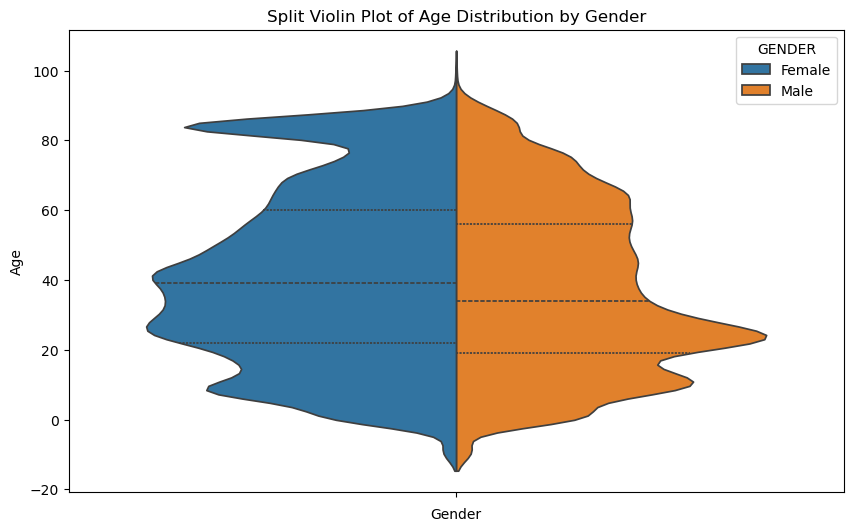

In [5]:

plt.figure(figsize=(10, 6))
sns.violinplot(y='MAX_SUBJECT_AGE', hue='GENDER', data=subject_overview_plot, split=True, inner='quart')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Split Violin Plot of Age Distribution by Gender')
plt.show()

### 10k Immunomics! 
## Hier hab ich so weit ich das verstehe n pures subset von ImmPort

## Step1. Zeugs importieren
## Step2 ID´s abgleichen ob es wirklich das gleiche ist

In [6]:
immu10k_prefix="/var/datasets/10kImmunomes/immunoassays/"

print("============================================================")
print("10k Immunome")
print("============================================================")
print("============================================================")

print("ELISA")
print("============================================================")
elisa_df = pd.read_table(f"{immu10k_prefix}/ELISA/Formatted_Files/elisa.csv", sep=',')
print(elisa_df.columns)
elisa_df.head()


10k Immunome
ELISA
Index(['subject_accession', 'study_accession', 'age', 'gender', 'race',
       'Bacillus anthracis Protective Antigen IgG', 'CCL11', 'CCL13', 'CCL17',
       'CCL2', 'CCL22', 'CCL26', 'CCL3', 'CCL4', 'CCL5', 'cholera_LPS', 'CSF2',
       'CXCL10', 'CXCL8', 'IFN@', 'IFN1@', 'IFNA2', 'IFNB1', 'IFNG', 'IL10',
       'IL12P70', 'IL13', 'IL1A', 'IL1B', 'IL2', 'IL4', 'IL5', 'IL6', 'IL7',
       'MIF', 'TNF', 'typhoid_Vi'],
      dtype='object')


,subject_accession,study_accession,age,gender,race,Bacillus anthracis Protective Antigen IgG,CCL11,CCL13,CCL17,CCL2,...,IL1A,IL1B,IL2,IL4,IL5,IL6,IL7,MIF,TNF,typhoid_Vi
0,SUB00240,SDY22,22.0,Female,Asian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06360
1,SUB00241,SDY22,23.0,Male,Asian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15865
2,SUB00242,SDY22,28.0,Male,Asian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.04770
3,SUB00243,SDY22,11.0,Female,Asian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19713
4,SUB00244,SDY22,17.0,Female,Asian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10745


In [65]:
common_ids = elisa_df['subject_accession'].isin(subject_overview['SUBJECT_ACCESSION'])
common_ids.sum()

3093

In [66]:
elisa_df.shape
### -> as suspected, the 10k immu is included in immport

(3093, 37)

In [9]:
### Arunachalam, Wimmers, et al. Science 2020
## DATA: COVID-19–infected patient samples and samples from age- and sex-matched healthy controls were obtained from two independent cohorts: 
# (i) the Princess Margaret Hospital at Hong Kong University and 
## GSE152418: 34 experiments,  76 COVID-19 patients and 69 age and sex- matched controls, from Hong Kong and Atlanta.
## Overall design: RNAseq analysis of PBMCs in a group of 17 COVID-19 subjects and 17 healthy controls

# (ii) the Hope Clinic at Emory University in Atlanta, Georgia, United States 
## GSE155673: CITE-seq, scRNAseq 5 healthy, 7 COVID. 24 Samples
##
paper1_prefix = "/var/datasets/single_papers/2020_Arunachalam_Wimmers"
## Step 1 Metadata about subjects... 
# Checked: Raw_counts, Matrix, Family -> Metadata from SRA run selector is okay
## Metadata: Gender, IDs, Phenotype
paper1_df = pd.read_table(f'{paper1_prefix}/GSE152418/metadata.txt', sep=',') 
paper1_df.columns

Index(['Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'Bytes', 'cell_type', 'Center Name', 'Consent', 'DATASTORE filetype',
       'DATASTORE provider', 'DATASTORE region', 'days_post_symptom_onset',
       'disease_state', 'Experiment', 'gender', 'GEO_Accession (exp)',
       'geographical_location', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'create_date', 'version', 'Sample Name', 'Severity',
       'source_name', 'SRA Study'],
      dtype='object')

In [7]:
paper1_df.shape

(68, 32)

In [10]:
paper1_df_GSE155673 = pd.read_table(f'{paper1_prefix}/GSE155673/metadata.txt', sep=',') 
paper1_df_GSE155673.head()

,Run,Age,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center Name,...,Organism,Platform,ReleaseDate,create_date,version,Sample Name,Sample_name,sex,source_name,SRA Study
0,SRR12404152,75,RNA-Seq,127,4705722618,PRJNA655740,SAMN15751363,2422148361,PBMC,GEO,...,Homo sapiens,ILLUMINA,2020-08-09T00:00:00Z,2020-08-06T22:04:00Z,1,GSM4712885,nCOV3EUHM,female,single cell mRNA,SRP276502
1,SRR12404153,75,RNA-Seq,127,4774315699,PRJNA655740,SAMN15751363,2508685744,PBMC,GEO,...,Homo sapiens,ILLUMINA,2020-08-09T00:00:00Z,2020-08-06T21:59:00Z,1,GSM4712885,nCOV3EUHM,female,single cell mRNA,SRP276502
2,SRR12404154,75,RNA-Seq,127,4845187922,PRJNA655740,SAMN15751363,2484581412,PBMC,GEO,...,Homo sapiens,ILLUMINA,2020-08-09T00:00:00Z,2020-08-06T22:07:00Z,1,GSM4712885,nCOV3EUHM,female,single cell mRNA,SRP276502
3,SRR12404155,75,RNA-Seq,127,4895740526,PRJNA655740,SAMN15751363,2509701381,PBMC,GEO,...,Homo sapiens,ILLUMINA,2020-08-09T00:00:00Z,2020-08-06T21:38:00Z,1,GSM4712885,nCOV3EUHM,female,single cell mRNA,SRP276502
4,SRR12404156,75,RNA-Seq,127,4939458244,PRJNA655740,SAMN15751363,2527824162,PBMC,GEO,...,Homo sapiens,ILLUMINA,2020-08-09T00:00:00Z,2020-08-06T22:25:00Z,1,GSM4712885,nCOV3EUHM,female,single cell mRNA,SRP276502


In [ ]:
### Back to ImmPort! 
#We want: 
# Table of subjects
# Table of Samples
# Table of ARM ?
##  Biomarkers and their description 
# seems to be in lab test data

In [7]:
print("LAB_TEST_PANEL")
print("============================================================")
lab_test_panel = pd.read_table(f"{immport_prefix}/lab_test_panel.txt",sep="\t")
print(lab_test_panel.columns)
print(lab_test_panel.shape)
print(lab_test_panel.head())

print("")
print("LAB_TEST")
print("============================================================")
lab_test = pd.read_table(f"{immport_prefix}/lab_test.txt",sep="\t")
print(lab_test.columns)
print(lab_test.shape)
lab_test.head()

LAB_TEST_PANEL
Index(['LAB_TEST_PANEL_ACCESSION', 'NAME_PREFERRED', 'NAME_REPORTED',
       'STUDY_ACCESSION', 'WORKSPACE_ID'],
      dtype='object')
(422, 5)
  LAB_TEST_PANEL_ACCESSION                      NAME_PREFERRED  \
0                  LP10000                      Chemistry Test   
1                  LP10001  Protein or Enzyme Type Measurement   
2                  LP10002                    Blood Cell Count   
3                  LP10007                                 NaN   
4                   LP1392  Protein or Enzyme Type Measurement   

      NAME_REPORTED STUDY_ACCESSION  WORKSPACE_ID  
0         CHEMISTRY          SDY354          3709  
1  SERUM_CREATININE          SDY354          3709  
2               CBC          SDY354          3709  
3    LIVER_FUNCTION          SDY354          3709  
4         Total IgE            SDY1           990  

LAB_TEST
Index(['LAB_TEST_ACCESSION', 'LAB_TEST_PANEL_ACCESSION', 'BIOSAMPLE_ACCESSION',
       'NAME_PREFERRED', 'NAME_REPORTED', 

,LAB_TEST_ACCESSION,LAB_TEST_PANEL_ACCESSION,BIOSAMPLE_ACCESSION,NAME_PREFERRED,NAME_REPORTED,REFERENCE_RANGE_ACCESSION,RESULT_UNIT_PREFERRED,RESULT_UNIT_REPORTED,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,WORKSPACE_ID
0,LT1,LP581,BS235842,White Blood Cell Count,WBC,RR81,NaN,10*3 cells/uL,8.5,8.5 10*3 cells/uL,990
1,LT10,LP581,BS235842,Eosinophils,EOSINOPHILS,RR13,percentage,%,1.0,1 %,990
2,LT100,LP581,BS235844,"Neutrophils, Segmented",SEGMENTED NEUTROPHILS,RR75,percentage,%,53.0,53 %,990
3,LT1000,LP581,BS236373,Basophils,BASOPHILS,RR5,percentage,%,0.0,0 %,990
4,LT10000,LP581,BS236064,Lymphocyte,LYMPHOCYTES,RR35,percentage,%,26.0,26 %,990


In [ ]:
### Evtl via NAME_PREFERRED oder NAME_REPORTED an alle individuellen marker kommen


In [18]:
lab_test_panel_short = lab_test_panel[['LAB_TEST_PANEL_ACCESSION','NAME_REPORTED','STUDY_ACCESSION']]
lab_test_panel_short = lab_test_panel_short.rename(columns={'NAME_REPORTED': 'PANEL_NAME'})
lab_test_panel_short.head()

,LAB_TEST_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION
0,LP10000,CHEMISTRY,SDY354
1,LP10001,SERUM_CREATININE,SDY354
2,LP10002,CBC,SDY354
3,LP10007,LIVER_FUNCTION,SDY354
4,LP1392,Total IgE,SDY1


In [19]:
lab_test_short = lab_test[['LAB_TEST_PANEL_ACCESSION','BIOSAMPLE_ACCESSION','NAME_REPORTED',
                           'RESULT_VALUE_PREFERRED','RESULT_VALUE_REPORTED','RESULT_UNIT_REPORTED']]
lab_test_short = lab_test_short = lab_test_short.rename(columns={'NAME_REPORTED': 'LAB_TEST_NAME'})
lab_test_short.head()

,LAB_TEST_PANEL_ACCESSION,BIOSAMPLE_ACCESSION,LAB_TEST_NAME,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED
0,LP581,BS235842,WBC,8.5,8.5 10*3 cells/uL,10*3 cells/uL
1,LP581,BS235842,EOSINOPHILS,1.0,1 %,%
2,LP581,BS235844,SEGMENTED NEUTROPHILS,53.0,53 %,%
3,LP581,BS236373,BASOPHILS,0.0,0 %,%
4,LP581,BS236064,LYMPHOCYTES,26.0,26 %,%


In [21]:
lab_tests = pd.merge(lab_test_panel_short,lab_test_short,
                    left_on='LAB_TEST_PANEL_ACCESSION',right_on='LAB_TEST_PANEL_ACCESSION')
print(lab_tests.shape)
lab_tests.head()

(1279882, 8)


,LAB_TEST_PANEL_ACCESSION,PANEL_NAME,STUDY_ACCESSION,BIOSAMPLE_ACCESSION,LAB_TEST_NAME,RESULT_VALUE_PREFERRED,RESULT_VALUE_REPORTED,RESULT_UNIT_REPORTED
0,LP10000,CHEMISTRY,SDY354,BS727101,H_URIC (URATE),12.0,12 MG/DL,MG/DL
1,LP10000,CHEMISTRY,SDY354,BS727102,H_BUN (BUN),24.0,24 MG/DL,MG/DL
2,LP10000,CHEMISTRY,SDY354,BS727106,H_URIC (URATE),5.4,5.4 MG/DL,MG/DL
3,LP10000,CHEMISTRY,SDY354,BS727106,H_BUN (BUN),29.0,29 MG/DL,MG/DL
4,LP10000,CHEMISTRY,SDY354,BS727110,H_BUN (BUN),17.0,17 MG/DL,MG/DL
